# Binary classification using multi input, one-hidden layer, one-output model
valing process:
1. prepare data sets: val, validation 
2. define model
3. evaluate model
4. compute gradient 
5. iteratively update model

## 1. Prepare datasets

In [54]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Prepare valing dataset
Standardize
$$Z = \frac{X - \mu} {\sigma}$$

In [55]:
# Load raw data
train_features_raw, train_labels_raw = make_moons(
    n_samples=2048, 
    noise=0.20, 
    random_state=3321
)

print(train_features_raw.shape)
print(train_labels_raw.shape)

# Preprocess raw data
features_train = (train_features_raw - train_features_raw.mean(axis=0)) / train_features_raw.std(axis=0)
labels_train = train_labels_raw.reshape(-1, 1)

print(features_train[:10])
print(features_train.shape)
print(labels_train.shape)

(2048, 2)
(2048,)
[[ 1.53203562 -0.15263674]
 [ 0.79780675 -1.41070808]
 [-0.49324547  1.61214009]
 [ 1.46884065 -0.90193738]
 [ 0.30330129 -1.79382366]
 [-1.76114285  0.2337773 ]
 [ 0.22874495 -0.71580082]
 [-0.52900003  1.49930645]
 [ 0.38644517 -0.58554379]
 [-0.67899353  1.84686347]]
(2048, 2)
(2048, 1)


## 1.2 Prepare Validation dataset

In [56]:
# Load raw data
val_features_raw, val_labels_raw = make_moons(
    n_samples=300, 
    noise=0.20, 
    random_state=1233
)

print(val_features_raw.shape)
print(val_labels_raw.shape)

# Preprocess raw data
features_val = (val_features_raw - val_features_raw.mean(axis=0)) / val_features_raw.std(axis=0)
labels_val = val_labels_raw.reshape(-1, 1)

print(labels_train[:10])
print(labels_val[:10])

(300, 2)
(300,)
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]


### 1.3 Visualize Data

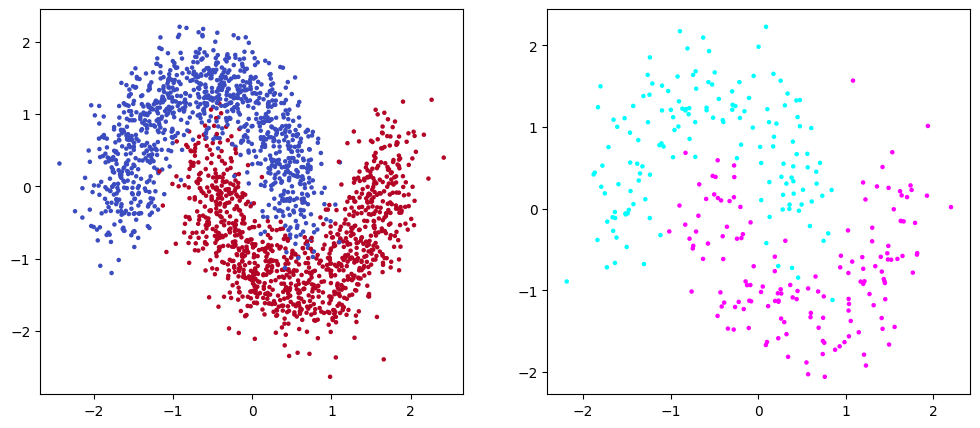

In [57]:
plt.figure(figsize=(12, 5))
# Plot left figure
plt.subplot(1, 2, 1)
plt.scatter(
    features_train[:, 0], 
    features_train[:, 1], 
    s=5 * np.ones(labels_train.size), 
    c=labels_train,
    cmap='coolwarm'
)

# Plot right figure
plt.subplot(1, 2, 2)
plt.scatter(
    features_val[:, 0], 
    features_val[:, 1], 
    s=5 * np.ones(labels_val.size), 
    c=labels_val,
    cmap='cool'
)

## 2. Set up the model - N11 Model

In [58]:
# Define linear model
def linear(in_features, weights, biases):
    out_features = in_features @ weights.T + biases
    return out_features

# Define non linear activation (sigmoid)
def sigmoid(in_features):
    out_features = 1 / (1 + np.exp(-in_features))
    return out_features

# Forward propagation
def forward(in_features, params):
    # hidden features (x1)
    features_1 = sigmoid(
        linear(
            in_features, params['W1'], params['b1']
        )
    )
    # Predictions output
    predictions = sigmoid(
        linear(
            features_1, params['W2'], params['b2']
        )
    )
    return predictions, features_1

params_dummy = {
    'W1': np.random.normal(size=(4, features_train.shape[1])), # (4,2) matrix , W1 shape is on slides
    'b1': np.random.normal(size=(1, 4)), 
    'W2': np.random.normal(size=(1, 4)), # (4,2) matrix , W2 shape is on slides
    'b2': np.random.normal()
}

preds_dummy, X1_dummy = forward(features_train, params_dummy)
print(preds_dummy.shape)
print(preds_dummy[:10])
# print(X1_dummy.shape)
# print(X1_dummy[:10])

(2048, 1)
[[0.26917143]
 [0.22477146]
 [0.82250112]
 [0.22013375]
 [0.23221349]
 [0.7342234 ]
 [0.31354446]
 [0.81386594]
 [0.31390411]
 [0.84890717]]


### 2.1. Visualise Decision Boundary

Text(0.5, 1.0, 'Validation')

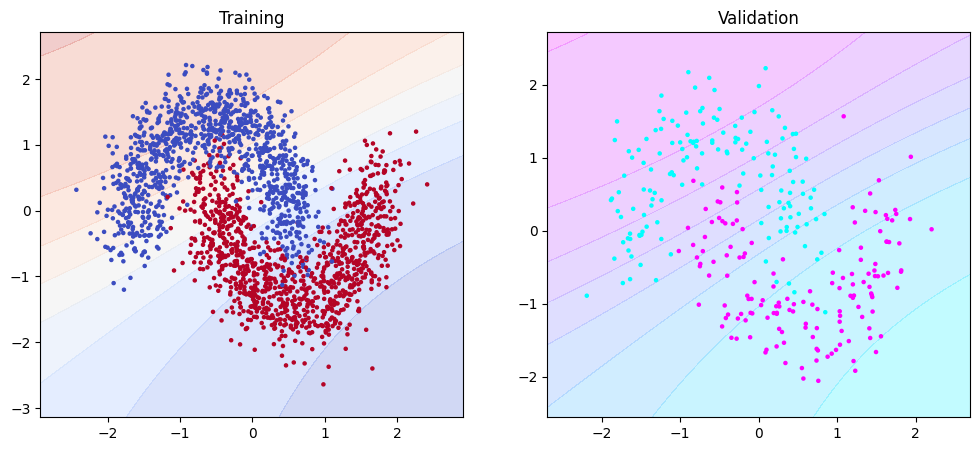

In [ ]:
def plot_decision_boundary(features, labels, params, colormap="coolwarm"):
    #define range of x and y used to create mesh to view entire 2d plane
    x_min, x_max = features[:, 0].min() - 0.5, features[:, 0].max() + 0.5
    y_min, y_max = features[:, 1].min() - 0.5, features[:, 1].max() + 0.5
    #create a mesh grid using the ranges above and points with a step of 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    # make a prediciton using the model on the entire mesh grid
    pp = forward(np.c_[xx.ravel(), yy.ravel()], params)[0]
    #reshape the predicitons back to the mesh grid shape
    pp = pp.reshape(xx.shape)
    # plot the contour
    plt.contourf(xx, 
                 yy, 
                 pp, 
                 cmap=colormap, 
                 alpha=0.25 # transparency level
    )
    # scatter data points onto grid/ overlap each other
    plt.scatter(features[:, 0], 
                features[:, 1], 
                c=labels, 
                s=5 * np.ones(labels.size), 
                cmap=colormap
    )

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(features_train, labels_train, params_dummy, colormap="coolwarm")
plt.title("Training")
plt.subplot(1, 2, 2)
plot_decision_boundary(features_val, labels_val, params_dummy, colormap="cool")
plt.title("Validation")


## 3. Evaluate Model

In [60]:
# BCE Loss function
def bce_loss(predictions, labels):
    error = -labels * np.log(predictions) - (1 - labels) * np.log(1 - predictions) # labels is y and predictions is yhat
    loss = error.mean() #over all loss
    return loss

# Accuracy of the model. this is the correction rate of the prediction
def accuracy(predictions, labels):
    #find out how many classifications can be labeled as 1
    predicted_binaries = (predictions >= 0.5).astype(int)
    # now we can use correct rate 
    correct_rate = (predicted_binaries == labels).mean()
    return correct_rate

print(f"BCE Loss: {bce_loss(preds_dummy, labels_train)}")
print(f"Accuracy: {accuracy(preds_dummy, labels_train)}")

BCE Loss: 1.2146922590597593
Accuracy: 0.138671875


## 4. Back-Propogate Gradients of Loss

In [61]:
# backpropagation
def backward(in_features, features_1, predictions, labels, params): # in features is X0 and features_1 is X1, 
    # number of samples
    num_samples = labels.shape[0] 
    #compute 2nd layer gradient
    dL_dW2 = (predictions - labels).T @ features_1 / num_samples
    dL_db2 = (predictions - labels).mean()
    #intermediate gradient
    dL_dX1 = (predictions - labels) @ params['W2']
    #compute 1st layer gradient 
    dL_dW1 = (dL_dX1 * features_1 * (1 - features_1)).T @ in_features / num_samples
    dL_db1 = (dL_dX1 * features_1 * (1 - features_1)).mean(axis=0, keepdims=True)

    # encode everything to grads dictionary
    grads = {
        "dW2": dL_dW2,
        "db2": dL_db2, 
        "dW1": dL_dW1,
        "db1": dL_db1
        
    }
    return grads

grads_dummy = backward(features_train, X1_dummy, preds_dummy, labels_train, params_dummy)
for k, v in grads_dummy.items():
    print(f"{k}: {v}")
#print(grads_dummy['db1'].shape) # should be (1, 4)
#print(params_dummy['b1'].shape) # should be (1, 4)


dW2: [[-0.19785781  0.14534839  0.12644298  0.16848254]]
db2: -0.001751810328652864
dW1: [[ 0.08594707 -0.08685667]
 [-0.06050917  0.10348463]
 [-0.06670748  0.07832766]
 [-0.00213606  0.00660373]]
db1: [[-0.02003089  0.00289167  0.05544264 -0.00146313]]


## 5. Iterative parameter optimization

In [65]:
# Initialize parameters
params = {
    'W1': np.random.normal(size=(128, features_train.shape[1])),
    'b1': np.random.normal(size=(1, 128)), 
    'W2': np.random.normal(size=(1, 128)),
    'b2': np.random.normal()
}

# set hyper parameters
num_iters = 1000
learning_rate = 0.1

# store loss and accuracy. reserve metrics storage
losses_train, losses_val = [], [] #stores the BCE loss
accuracies_train, accuracies_val = [], [] #stores the training result

# Training loop
for i in range(num_iters):
    # forward pass / propagation
    preds_train, features_1_train = forward(features_train, params)
    # how the model works on the validation set
    preds_val, features_1_val = forward(features_val, params)
    # Evaluate the model perfomance using BCE and accuracy
    loss_train = bce_loss(preds_train, labels_train)
    # BCE loss on validation set
    loss_val = bce_loss(preds_val, labels_val)
    # accuracy for the training data set using current model
    acc_train = accuracy(preds_train, labels_train)
    # accuracy for the validation data set using current model
    acc_val = accuracy(preds_val, labels_val)
    # append the current iterations loss and accuracy to storage
    losses_train.append(loss_train)
    # losses on validation set
    losses_val.append(loss_val)
    # accuracies for training set
    accuracies_train.append(acc_train)
    # accuracies for validation set
    accuracies_val.append(acc_val)
    
    # real time report on training
    print(f"iteration: {i + 1}: Train Loss: {loss_train}, Val Loss: {loss_val}")
    #print(f"iteration: {i + 1}: Train Acc: {acc_train}, Val Acc: {acc_val}")

    # backward pass / backpropagation for gradients of loss
    grads = backward(features_train, features_1_train, preds_train, labels_train, params)
    # gradient descent parameter update
    params['W1'] -= learning_rate * grads['dW1']
    params['b1'] -= learning_rate * grads['db1']
    params['W2'] -= learning_rate * grads['dW2']
    params['b2'] -= learning_rate * grads['db2']

iteration: 1: Train Loss: 3.250275418501296, Val Loss: 3.209224740382672
iteration: 2: Train Loss: 2.5923457350118664, Val Loss: 2.562501498751416
iteration: 3: Train Loss: 2.123718518578727, Val Loss: 2.110655278617846
iteration: 4: Train Loss: 1.8082546051548947, Val Loss: 1.808246498511993
iteration: 5: Train Loss: 1.5962801503719242, Val Loss: 1.6050337056767512
iteration: 6: Train Loss: 1.4488680623570915, Val Loss: 1.4638183636484603
iteration: 7: Train Loss: 1.341324018181484, Val Loss: 1.3607912062894494
iteration: 8: Train Loss: 1.2587964930082403, Val Loss: 1.2815089574508705
iteration: 9: Train Loss: 1.1923926900881021, Val Loss: 1.2173152722655944
iteration: 10: Train Loss: 1.1367451387920386, Val Loss: 1.1630131842150728
iteration: 11: Train Loss: 1.0885703139886984, Val Loss: 1.1154752381118722
iteration: 12: Train Loss: 1.0458223075674051, Val Loss: 1.072804610051188
iteration: 13: Train Loss: 1.0071942696999272, Val Loss: 1.0338288393328083
iteration: 14: Train Loss: 0.

### 5.1 Plot Losses and Accuracies

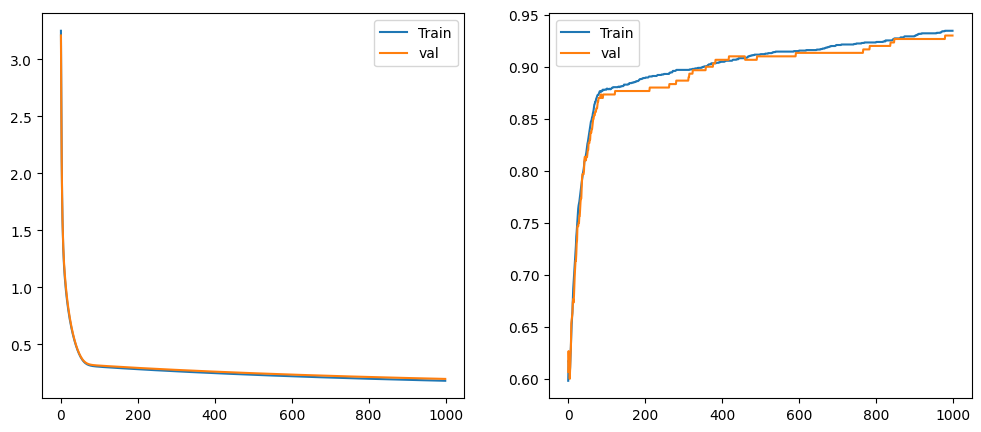

In [66]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), losses_train, range(num_iters), losses_val)
plt.legend(['Train', 'val'])
plt.subplot(1, 2, 2)
plt.plot(range(num_iters), accuracies_train, range(num_iters), accuracies_val)
plt.legend(['Train', 'val'])

### 5.2 Visualize Decision Boundaries

Text(0.5, 1.0, 'Validation')

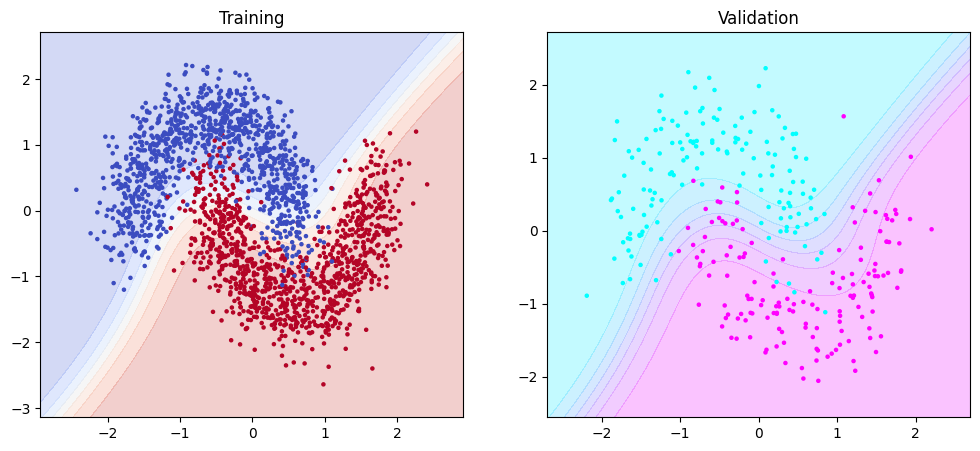

In [68]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(features_train, labels_train, params, colormap="coolwarm")
plt.title("Training")
plt.subplot(1, 2, 2)
plot_decision_boundary(features_val, labels_val, params, colormap="cool")
plt.title("Validation")